# Problem Statement

- Customer Segmentation Analysis:

Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import os
from datetime import datetime

%matplotlib inline  

import warnings
warnings.filterwarnings('ignore') # Suppress all warnings

### Data Collection and Analysis

In [5]:
# Loading the data from csv file to a pandas dataframe
data_folder = "data"
file_name = "mall_customers.csv"

file_path = os.path.join(data_folder,file_name)

In [6]:
try:
    customer_data = pd.read_csv(file_path)
    print("CSV file read successfully")
except FileNotFoundError: 
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occured: {e}")

CSV file read successfully


In [7]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# the number of rows and columns
customer_data.shape

(200, 5)

In [12]:
# column information about data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [34]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [36]:
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [37]:
customer_data.drop(['CustomerID'], axis=1, inplace=True)

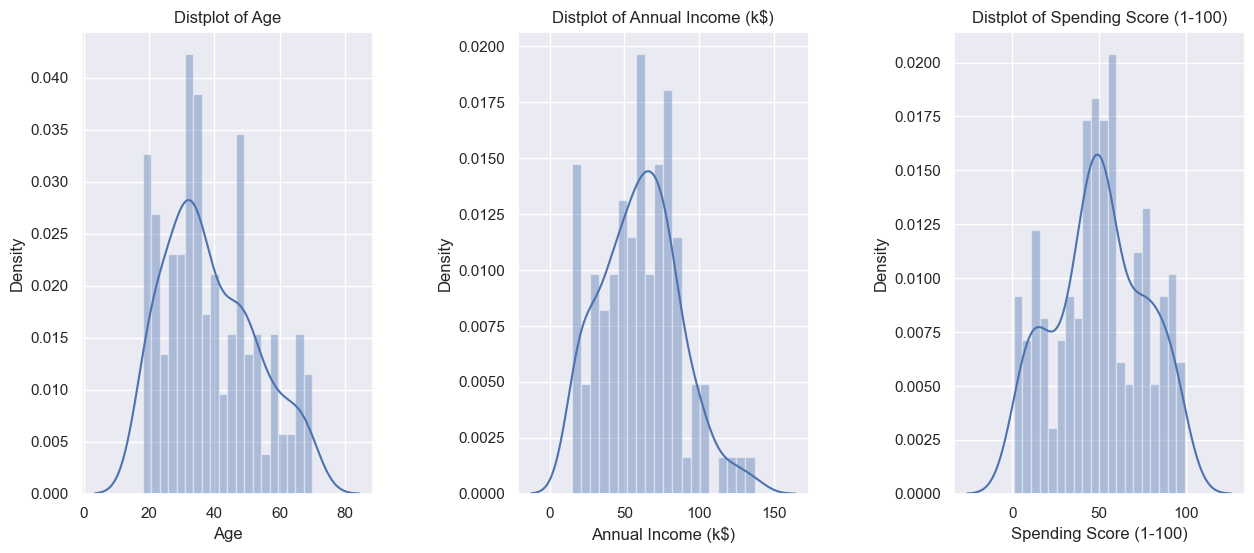

In [38]:
plt.figure(1,figsize=(15,6))
n = 0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(customer_data[x], bins =20)
    plt.title("Distplot of {}".format(x))
plt.show()

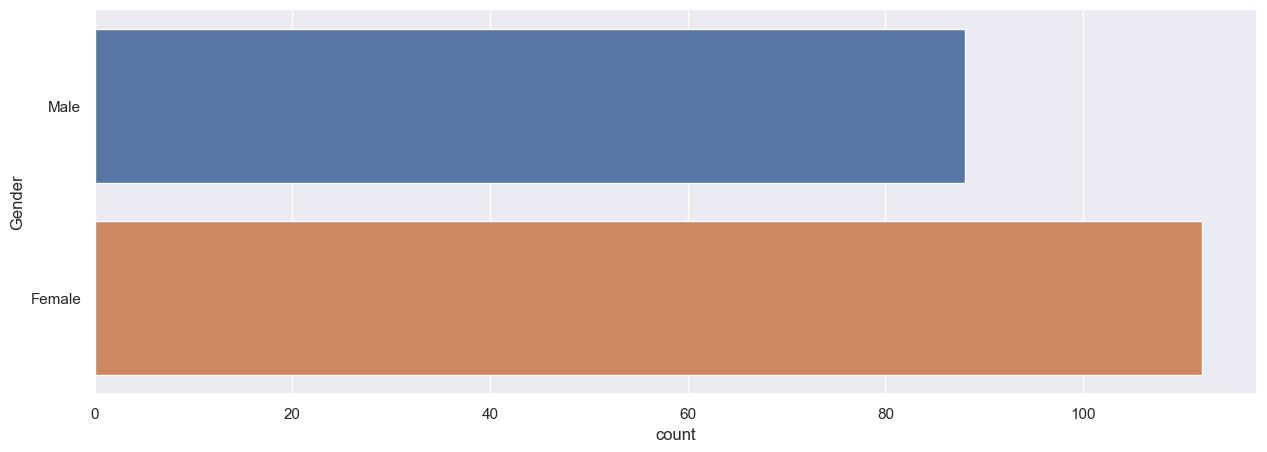

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(y = 'Gender', data = customer_data)
plt.show()

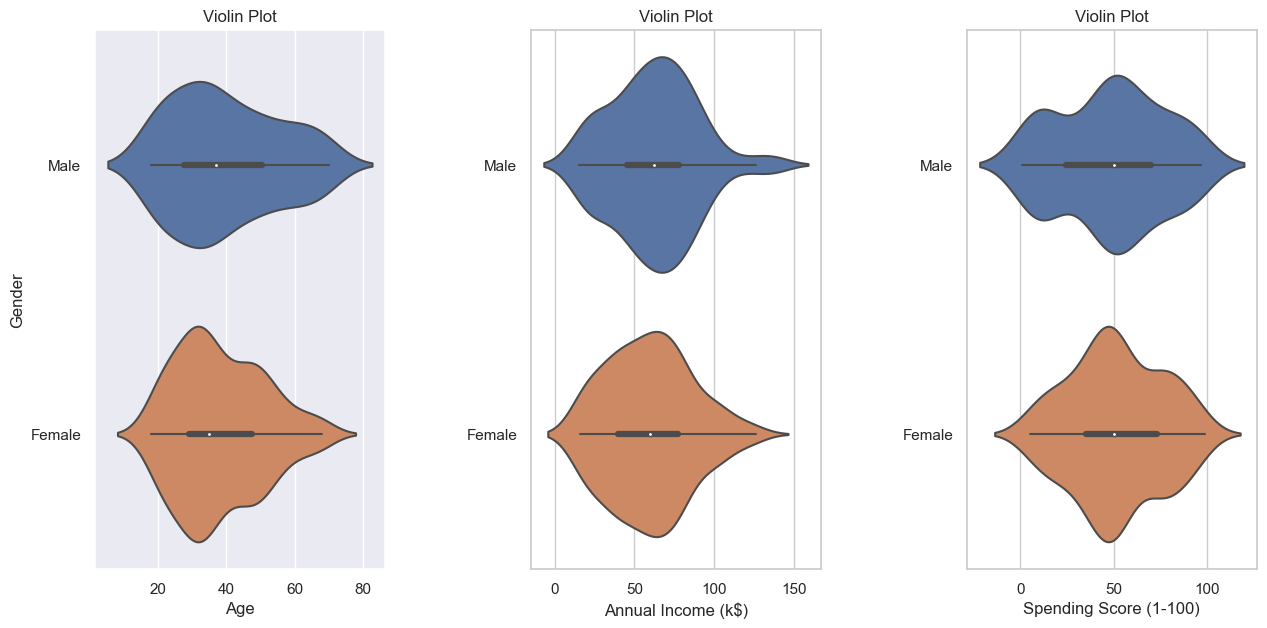

In [42]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x = cols, y = 'Gender', data = customer_data)
    plt.ylabel("Gender" if n == 1 else "")
    plt.title("Violin Plot")
plt.show()

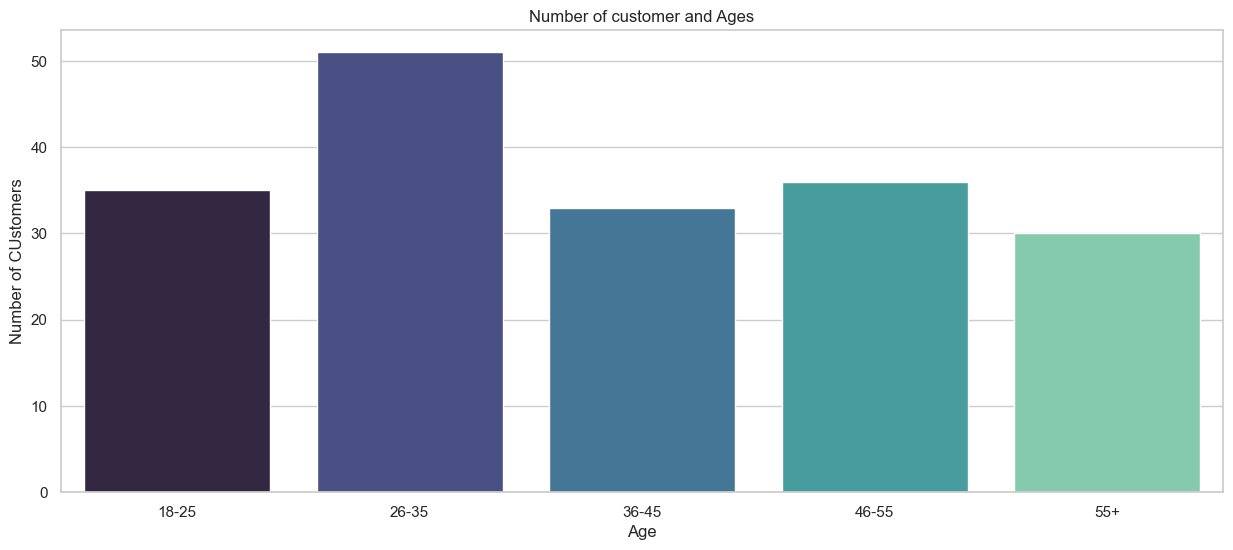

In [48]:
age_18_25 = customer_data.Age[(customer_data.Age>=18) & (customer_data
.Age<25)]
age_26_35 = customer_data.Age[(customer_data.Age>=26) & (customer_data
.Age<35)]
age_36_45 = customer_data.Age[(customer_data.Age>=36) & (customer_data
.Age<45)]
age_46_55 = customer_data.Age[(customer_data.Age>=46) & (customer_data
.Age<55)]
age_55above = customer_data.Age[customer_data.Age >= 55]

agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = agex, y = agey, palette="mako")
plt.title("Number of customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of CUstomers")
plt.show()

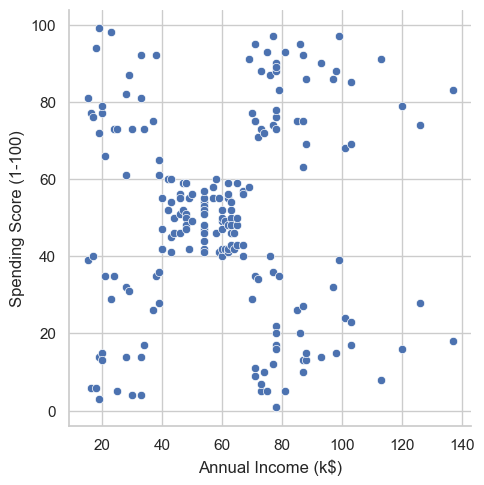

In [49]:
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=customer_data)

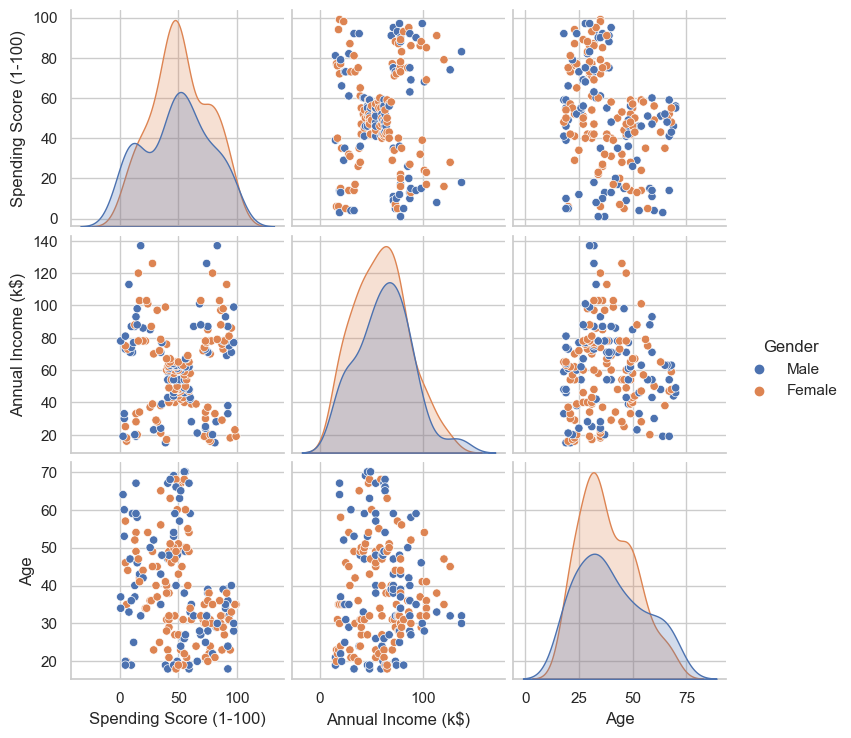

In [51]:
sns.pairplot(customer_data, vars = ['Spending Score (1-100)',
                          'Annual Income (k$)', 'Age'], hue = 'Gender')

In [17]:
X = customer_data.iloc[:,[3,4]].values

In [19]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [20]:
# choosing the number of clusters
# WCSS -> Within clusters sum of square

In [21]:
# finding wcss values for different number of clusters

In [25]:
wcss =[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

269981.28
181363.595959596
106348.37306211118
73679.78903948836
44448.45544793371
37233.81451071001
30241.34361793659
25036.417604033984
21916.794789843727
20072.070939404006


Text(0.5, 0, 'The number of clustors')

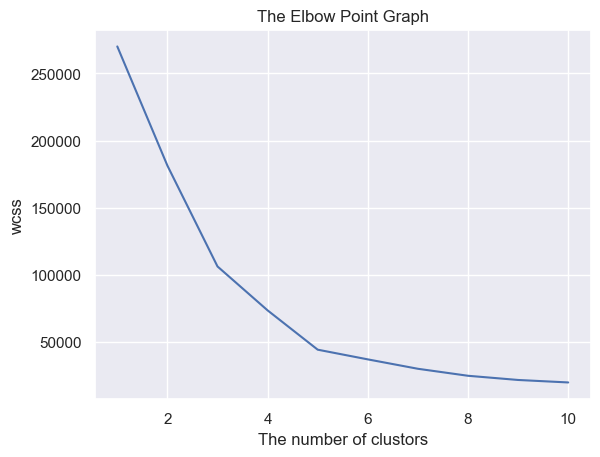

In [23]:
# Plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.ylabel("wcss")
plt.xlabel("The number of clustors")

Optimum number of clustors = 5

In [26]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state = 42)

In [27]:
# return a label for each data point basd on their clustors
y = kmeans.fit_predict(X)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Visualizing all the clustors



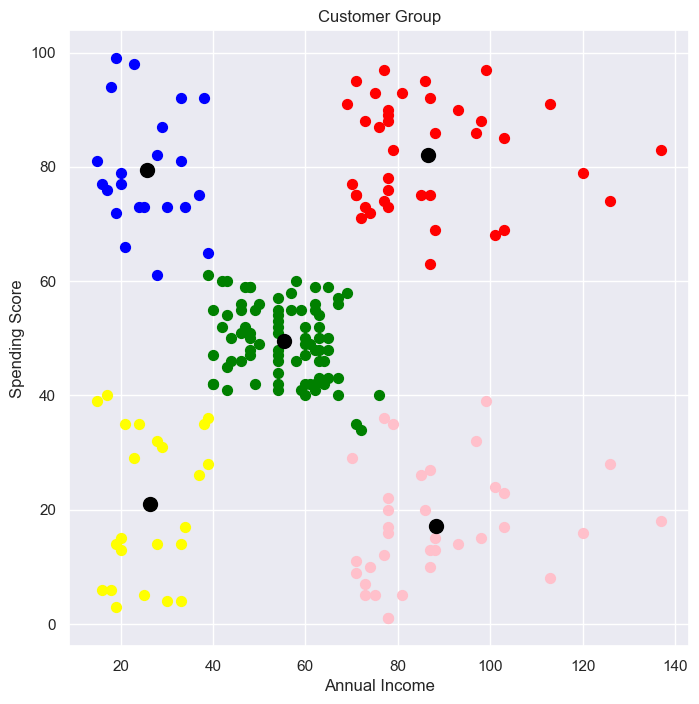

In [33]:
# Plotting all the clustors and their Centroid

plt.figure(figsize = (8,8))
plt.scatter(X[y==0,0], X[y==0,1], s =50, c = 'green', label='cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s =50, c = 'red', label='cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s =50, c = 'blue', label='cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s =50, c = 'pink', label='cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s =50, c = 'yellow', label='cluster 5')

# Plot the centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = 'black', label='centroids')
plt.title('Customer Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()